In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('data/migrations.xlsx')
df

,fromLib,toLib,repoName,fileName,startCommit,endCommit,startCommitChanges,endCommitChanges,startCommitMessage,endCommitMessage,startCommitTime,endCommitTime
0,ant:ant,org.apache.ant:ant,bobmcwhirter_drools,pom.xml,0504ef4b2349dd7edc4d4991d29f688dc15da939,0504ef4b2349dd7edc4d4991d29f688dc15da939,+org.apache.ant:ant\n+org.apache.ant:ant-apach...,+org.apache.ant:ant\n+org.apache.ant:ant-apach...,JBRULES-2737 Build with maven 3 fails on Guvno...,JBRULES-2737 Build with maven 3 fails on Guvno...,2010-10-20 11:19:32,2010-10-20 11:19:32
1,ant:ant,org.apache.ant:ant,wocommunity_wolips,woproject-ant-tasks/pom.xml,1d02c267e787b0c97ef9a3fb3b63da33e8f3c6d9,1d02c267e787b0c97ef9a3fb3b63da33e8f3c6d9,+org.apache.ant:ant\n+org.apache.ant:ant-junit...,+org.apache.ant:ant\n+org.apache.ant:ant-junit...,Using Ant 1.7.1 as dependency for woproject-an...,Using Ant 1.7.1 as dependency for woproject-an...,2008-09-06 16:31:29,2008-09-06 16:31:29
2,ant:ant,org.apache.ant:ant,teiid_teiid,pom.xml,204ea9614df7b99c46cc054877c5bea4d145b460,204ea9614df7b99c46cc054877c5bea4d145b460,+org.apache.ant:ant\n-ant:ant,+org.apache.ant:ant\n-ant:ant,updating ant groupid\n,updating ant groupid\n,2009-01-19 20:58:19,2009-01-19 20:58:19
3,ant:ant,org.apache.ant:ant,apache_axis2-java,modules/parent/pom.xml,2233b385c9f07b726c11bd5e1e2c00a350622eb3,2233b385c9f07b726c11bd5e1e2c00a350622eb3,+org.apache.ant:ant\n-ant:ant,+org.apache.ant:ant\n-ant:ant,fix the group id for latest version of ant\n\n...,fix the group id for latest version of ant\n\n...,2007-02-05 04:51:31,2007-02-05 04:51:31
4,ant:ant,org.apache.ant:ant,apache_axis2-java,modules/tool/axis2-idea-plugin/pom.xml,2233b385c9f07b726c11bd5e1e2c00a350622eb3,2233b385c9f07b726c11bd5e1e2c00a350622eb3,+org.apache.ant:ant\n-ant:ant,+org.apache.ant:ant\n-ant:ant,fix the group id for latest version of ant\n\n...,fix the group id for latest version of ant\n\n...,2007-02-05 04:51:31,2007-02-05 04:51:31
...,...,...,...,...,...,...,...,...,...,...,...,...
14329,xstream:xstream,com.thoughtworks.xstream:xstream,kiegroup_kogito-runtimes,drools-core/pom.xml,ae5bf7e576bce9bc7c1871b323dc81bbded46b55,ae5bf7e576bce9bc7c1871b323dc81bbded46b55,+com.thoughtworks.xstream:xstream\n-xstream:xs...,+com.thoughtworks.xstream:xstream\n-xstream:xs...,JBRULES-1128 JBRULES-992: optional dependencie...,JBRULES-1128 JBRULES-992: optional dependencie...,2007-08-25 19:35:52,2007-08-25 19:35:52
14330,xstream:xstream,com.thoughtworks.xstream:xstream,sakaiproject_sakai,gradebook/service/impl/pom.xml,d32f1ecd4a80a1f4b1ccda1763c6d7f0f5462584,d32f1ecd4a80a1f4b1ccda1763c6d7f0f5462584,+com.thoughtworks.xstream:xstream\n-xstream:xs...,+com.thoughtworks.xstream:xstream\n-xstream:xs...,Fixed issue with xstream\n\n\ngit-svn-id: http...,Fixed issue with xstream\n\n\ngit-svn-id: http...,2007-01-30 11:05:11,2007-01-30 11:05:11
14331,xstream:xstream,com.thoughtworks.xstream:xstream,sakaiproject_sakai,gradebook/service/sakai-pack/pom.xml,d32f1ecd4a80a1f4b1ccda1763c6d7f0f5462584,d32f1ecd4a80a1f4b1ccda1763c6d7f0f5462584,+com.thoughtworks.xstream:xstream\n-xstream:xs...,+com.thoughtworks.xstream:xstream\n-xstream:xs...,Fixed issue with xstream\n\n\ngit-svn-id: http...,Fixed issue with xstream\n\n\ngit-svn-id: http...,2007-01-30 11:05:11,2007-01-30 11:05:11
14332,xstream:xstream,com.thoughtworks.xstream:xstream,apache_shindig,1.0.x-incubating/java/social-api/pom.xml,f6cabfb61fbbc6a6afbda13b39189c005c681967,f6cabfb61fbbc6a6afbda13b39189c005c681967,+com.thoughtworks.xstream:xstream\n-xstream:xs...,+com.thoughtworks.xstream:xstream\n-xstream:xs...,SHINDIG-837 | Patch from Vincent Siveton | Del...,SHINDIG-837 | Patch from Vincent Siveton | Del...,2009-01-12 04:07:09,2009-01-12 04:07:09


In [394]:
G = nx.DiGraph()
for i in range(len(df)):
    mig = df.loc[i]
    if(G.has_edge(mig['fromLib'], mig['toLib'])):
        G[mig['fromLib']][mig['toLib']]['weight'] += 1
    else:
        G.add_edge(mig['fromLib'], mig['toLib'], weight=1)
G.number_of_edges(), G.number_of_nodes()

(1401, 904)

In [395]:
# # remove edges where weight <=1
# to_be_removed = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] <= 1]
# print(to_be_removed)
# G.remove_edges_from(to_be_removed)

# # remove isolates
# G.remove_nodes_from(list(nx.isolates(G)))

# G.nodes(), G.edges(data=True)

In [396]:
# from networkx.algorithms import node_classification
# G.nodes['log4j:log4j']["label"] = "LOG"
# G.nodes['org.json:json']["label"] = "JSON"
# G.edges(data=True)

In [397]:
# maybe it would improve perf?
for edge in G.edges(data=True):
    edge[2]['weight'] = 1 / edge[2]['weight']
G.edges(data=True)

OutEdgeDataView([('ant:ant', 'org.apache.ant:ant', {'weight': 0.022727272727272728}), ('ant:ant', 'org.apache.ant:ant-apache-regexp', {'weight': 1.0}), ('ant:ant', 'org.apache.ant:ant-junit', {'weight': 1.0}), ('ant:ant', 'org.apache.ant:ant-nodeps', {'weight': 0.25}), ('ant:ant', 'org.apache.ant:ant-trax', {'weight': 1.0}), ('org.apache.ant:ant', 'ant:ant', {'weight': 0.25}), ('org.apache.ant:ant', 'org.codehaus.plexus:plexus-utils', {'weight': 1.0}), ('antlr:antlr', 'org.antlr:antlr-runtime', {'weight': 0.5}), ('org.antlr:antlr-runtime', 'org.antlr:antlr4-runtime', {'weight': 1.0}), ('antlr:stringtemplate', 'org.antlr:stringtemplate', {'weight': 1.0}), ('aopalliance:aopalliance', 'com.google.inject.extensions:guice-jmx', {'weight': 1.0}), ('aopalliance:aopalliance', 'com.google.inject:guice', {'weight': 0.2}), ('aopalliance:aopalliance', 'org.springframework:spring-beans', {'weight': 1.0}), ('aopalliance:aopalliance', 'org.springframework:spring-context', {'weight': 1.0}), ('aopallia

In [398]:
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings
import collections
from stellargraph import datasets
from IPython.display import display, HTML
import matplotlib.pyplot as plt

%matplotlib inline

In [399]:
walk_length = 100  # maximum length of a random walk to use throughout this notebook

In [400]:
mig_graph = StellarGraph.from_networkx(G)

In [401]:
print(mig_graph.info())

StellarDiGraph: Directed multigraph
 Nodes: 904, Edges: 1401

 Node types:
  default: [904]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [1401]
        Weights: range=[0.0019685, 1], mean=0.549571, std=0.38727
        Features: none


In [402]:
rw = BiasedRandomWalk(mig_graph)

In [403]:
weighted_walks = rw.run(
    nodes=G.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=114514,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 9040


In [431]:
weighted_model = Word2Vec(
    weighted_walks, size=200, window=5, min_count=0, sg=1, workers=1, iter=1
)

In [432]:
emb = weighted_model.wv['org.json:json']
emb.shape

(200,)

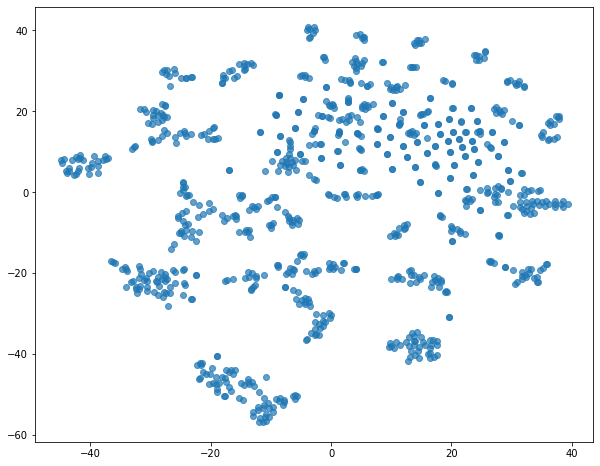

In [433]:
# Retrieve node embeddings and corresponding subjects
node_ids = weighted_model.wv.index2word  # list of node IDs
weighted_node_embeddings = (
    weighted_model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = G.nodes  # node labels


# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=2, random_state=42)
weighted_node_embeddings_2d = tsne.fit_transform(weighted_node_embeddings)

# draw the points
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    cmap="jet",
    alpha=0.7,
)
plt.show()

In [434]:
# X will hold the 128-dimensional input features
X = weighted_node_embeddings
# y holds the corresponding target values
y = np.array(node_targets)
X

array([[ 0.14038877,  0.24049287, -0.47779742, ...,  0.17710291,
         0.35016346, -0.06179614],
       [-0.12428813,  0.3410927 , -0.5424823 , ..., -0.06754783,
         0.22755563,  0.00287103],
       [-0.05950314,  0.06665662, -0.41577306, ..., -0.16918726,
         0.28516337, -0.09776624],
       ...,
       [-0.00100849,  0.02483405, -0.02504084, ...,  0.03325156,
         0.01955076, -0.01318152],
       [ 0.02292496, -0.00889278, -0.10290706, ..., -0.01378635,
         0.00381931,  0.04592366],
       [ 0.2214472 , -0.03416533, -0.134073  , ..., -0.03525087,
         0.00449444,  0.06550706]], dtype=float32)

In [435]:

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, train_size=0.75, test_size=None, random_state=42
# )
# print(
#     "Array shapes:\n X_train = {}\n y_train = {}\n X_test = {}\n y_test = {}".format(
#         X_train.shape, y_train.shape, X_test.shape, y_test.shape
#     )
# )

In [436]:
# Cluster with Mean-shift
# from sklearn.cluster import MeanShift, estimate_bandwidth

# bandwidth = estimate_bandwidth(weighted_node_embeddings_2d, quantile = 0.1, n_samples = 100)
 
# ms = MeanShift(bandwidth = bandwidth, bin_seeding = True)
# ms.fit(weighted_node_embeddings_2d)

# labels = ms.labels_
# cluster_centers = ms.cluster_centers_
# labels_unique = np.unique(labels)
# len(labels_unique)

In [447]:
# Cluster with DBSCAN
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=5, min_samples=3).fit(weighted_node_embeddings_2d)

labels = clustering.labels_
labels_unique = np.unique(labels)
len(labels_unique)

16

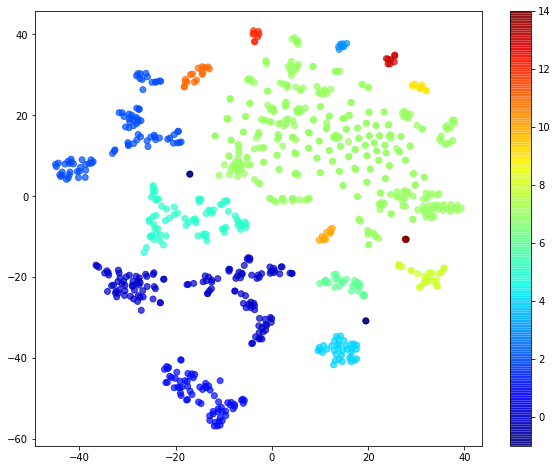

In [448]:
# draw the points
alpha = 0.7

plt.figure(figsize=(10, 8))
plt.scatter(
    weighted_node_embeddings_2d[:, 0],
    weighted_node_embeddings_2d[:, 1],
    cmap="jet",
    c=labels,
    alpha=0.7
)
cbar = plt.colorbar()
plt.show()

In [449]:
res = {}
index = 0
for name in node_ids:
    res[name]=labels[index]
    index += 1
res = dict(sorted(res.items(), key=lambda item: item[1]))
res

{'org.slf4j:jul-to-slf4j': -1,
 'com.sun.jersey:jersey-json': -1,
 'org.glassfish.jersey.media:jersey-media-json-jettison': -1,
 'org.apache.logging.log4j:log4j-jul': -1,
 'com.google.code.gson:gson': 0,
 'com.fasterxml.jackson.core:jackson-annotations': 0,
 'com.fasterxml.jackson.core:jackson-core': 0,
 'com.fasterxml.jackson.core:jackson-databind': 0,
 'org.json:json': 0,
 'javax:javaee-api': 0,
 'com.alibaba:fastjson': 0,
 'org.codehaus.jackson:jackson-mapper-asl': 0,
 'org.hibernate.javax.persistence:hibernate-jpa-2.1-api': 0,
 'org.codehaus.jackson:jackson-core-asl': 0,
 'com.googlecode.json-simple:json-simple': 0,
 'com.google.inject:guice': 0,
 'aopalliance:aopalliance': 0,
 'javax.json:javax.json-api': 0,
 'com.fasterxml.jackson:jackson-bom': 0,
 'org.springframework.boot:spring-boot-dependencies': 0,
 'org.springframework.boot:spring-boot-starter-data-jpa': 0,
 'net.sf.json-lib:json-lib': 0,
 'org.mybatis:mybatis': 0,
 'org.codehaus.jackson:jackson-jaxrs': 0,
 'com.fasterxml.j

In [350]:
df["Category"]
for key, value in res.items():
    fromlib_index = df.index[df['fromLib'] == key].tolist()
    for index in fromlib_index:
        df.at[index, "Category"] = value

In [463]:
# convert datetime 
# ref:https://stackoverflow.com/questions/61802080/excelwriter-valueerror-excel-does-not-support-datetime-with-timezone-when-savin
df['startCommitTime'] = df['startCommitTime'].apply(lambda a: pd.to_datetime(a).date()) 
df['endCommitTime'] = df['endCommitTime'].apply(lambda a: pd.to_datetime(a).date()) 
# save as excel
df.to_excel('classified_res.xlsx')

In [464]:
G = nx.Graph()
for i in range(len(df)):
    mig = df.loc[i]
    if(G.has_edge(mig['fromLib'], mig['toLib'])):
        G[mig['fromLib']][mig['toLib']]['weight'] += 1
    else:
        G.add_edge(mig['fromLib'], mig['toLib'], weight=1)
G.number_of_edges(), G.number_of_nodes()

(1243, 904)

In [465]:
import community
partition = community.best_partition(G, weight='weight')
modularity2 = community.modularity(louvain_partition, G, weight='weight')
print("The modularity Q based on networkx is {}".format(modularity2))

The modularity Q based on networkx is 0.8473563506318368


In [466]:
res = dict(sorted(partition.items(), key=lambda item: item[1]))
res

{'ant:ant': 0,
 'org.apache.ant:ant': 0,
 'org.apache.ant:ant-apache-regexp': 0,
 'org.apache.ant:ant-junit': 0,
 'org.apache.ant:ant-nodeps': 0,
 'org.apache.ant:ant-trax': 0,
 'commons-io:commons-io': 0,
 'org.apache.commons:commons-io': 0,
 'org.codehaus.plexus:plexus-utils': 0,
 'antlr:antlr': 1,
 'org.antlr:antlr-runtime': 1,
 'org.antlr:antlr4-runtime': 1,
 'com.tunnelvisionlabs:antlr4-runtime': 1,
 'org.codehaus.mojo:javacc-maven-plugin': 1,
 'org.parboiled:parboiled-java': 1,
 'antlr:stringtemplate': 2,
 'org.antlr:stringtemplate': 2,
 'aopalliance:aopalliance': 3,
 'com.google.inject.extensions:guice-jmx': 3,
 'com.google.inject:guice': 3,
 'org.springframework:spring-beans': 3,
 'org.springframework:spring-context': 3,
 'org.springframework:spring-core': 3,
 'com.google.inject.extensions:guice-assistedinject': 3,
 'com.google.gwt.inject:gin': 3,
 'com.squareup.dagger:dagger': 3,
 'com.squareup.dagger:dagger-compiler': 3,
 'com.google.inject.extensions:guice-multibindings': 3,

In [467]:
for key, value in res.items():
    fromlib_index = df.index[df['fromLib'] == key].tolist()
    for index in fromlib_index:
        df.at[index, "Category"] = value

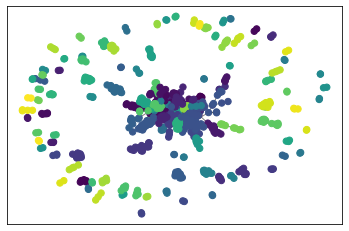

In [468]:
import matplotlib.cm as cm
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, 
                        cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [469]:
# convert datetime 
# ref:https://stackoverflow.com/questions/61802080/excelwriter-valueerror-excel-does-not-support-datetime-with-timezone-when-savin
df['startCommitTime'] = df['startCommitTime'].apply(lambda a: pd.to_datetime(a).date()) 
df['endCommitTime'] = df['endCommitTime'].apply(lambda a: pd.to_datetime(a).date()) 
# save as excel
df.to_excel('classified_res.xlsx')

In [476]:
labels = list(value for (key, value) in res.items())
print(labels)
labels_unique = np.unique(labels)
cnt = {}
for label in labels:
    if not label in cnt:
        cnt[label] = 1
    else:
        cnt[label] += 1

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19,

{0: 9,
 1: 6,
 2: 2,
 3: 61,
 4: 5,
 5: 27,
 6: 4,
 7: 2,
 8: 13,
 9: 3,
 10: 2,
 11: 38,
 12: 56,
 13: 15,
 14: 3,
 15: 5,
 16: 3,
 17: 8,
 18: 15,
 19: 11,
 20: 3,
 21: 39,
 22: 7,
 23: 2,
 24: 3,
 25: 11,
 26: 2,
 27: 18,
 28: 39,
 29: 41,
 30: 21,
 31: 29,
 32: 4,
 33: 9,
 34: 2,
 35: 12,
 36: 2,
 37: 2,
 38: 2,
 39: 17,
 40: 2,
 41: 9,
 42: 2,
 43: 3,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 13,
 50: 3,
 51: 8,
 52: 2,
 53: 3,
 54: 2,
 55: 2,
 56: 3,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 2,
 62: 8,
 63: 3,
 64: 8,
 65: 2,
 66: 10,
 67: 14,
 68: 3,
 69: 2,
 70: 2,
 71: 12,
 72: 2,
 73: 30,
 74: 2,
 75: 4,
 76: 4,
 77: 5,
 78: 2,
 79: 2,
 80: 6,
 81: 2,
 82: 5,
 83: 4,
 84: 31,
 85: 2,
 86: 16,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 9,
 92: 2,
 93: 3,
 94: 4,
 95: 3,
 96: 5,
 97: 2,
 98: 2,
 99: 6,
 100: 7,
 101: 3,
 102: 4,
 103: 4,
 104: 3,
 105: 4,
 106: 2,
 107: 8,
 108: 2,
 109: 2,
 110: 2,
 111: 4,
 112: 3,
 113: 2,
 114: 2,
 115: 2}

<BarContainer object of 116 artists>

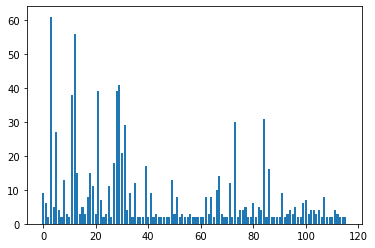

In [479]:
x = list(key for (key, value) in cnt.items())
y = list(value for (key, value) in cnt.items())
plt.bar(x,y)

In [492]:
df2 = pd.DataFrame.from_dict(res, orient='index')
df2

,0
ant:ant,0
org.apache.ant:ant,0
org.apache.ant:ant-apache-regexp,0
org.apache.ant:ant-junit,0
org.apache.ant:ant-nodeps,0
...,...
org.ocpsoft.rewrite:rewrite-servlet,113
org.webjars:bootstrap,114
de.agilecoders.wicket:wicket-bootstrap-core,114
org.xerial.snappy:snappy-java,115


In [494]:
df2.to_excel('cls.xlsx')